In [1]:
import numpy as np
import pandas as pd

file_ = "/content/sample_data/Maternal Health Risk Data Set.csv"
df = pd.read_csv(file_)
df.head()



,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
class_mapping = {'high risk':2, 'mid risk':1, 'low risk':0}
df['RiskLevel'] = df['RiskLevel'].map(class_mapping)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


In [ ]:
print (df.shape)
print('')

print(df.info())
print('')

print(df.isnull().sum())
print('')

print(df.describe().T)
print('')

print(df.corr())
print('')

high_risk = df['RiskLevel'].value_counts()[2]

med_risk = df['RiskLevel'].value_counts()[1]

low_risk = df['RiskLevel'].value_counts()[0]

print("Percentage of High Risk Label:",((high_risk/(high_risk+med_risk+low_risk))*100))
print("Percentage of Medium Risk Label:",((med_risk/(high_risk+med_risk+low_risk))*100))
print("Percentage of Low Risk Label:",((low_risk/(high_risk+med_risk+low_risk))*100))



(1014, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB
None

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

              count        mean        std   min    25%    50%    75%    max
Age          1014.0   29.871795  13.474386  10.0   19.0   26.0   39.0   70.0
SystolicBP   1014.0  113.198225  18.403913  70.0  100.0  120.0  120.0  160.0
DiastolicBP  1014.0   76.460552  13.885796  49.0   65.0   80.0   90.0  100.0
BS     

In [ ]:
#Feature Importance
from sklearn.ensemble import RandomForestClassifier

feat_labels = df.columns[:-1]
forest = RandomForestClassifier(criterion = 'gini', n_estimators = 100, random_state = 1, n_jobs = -1)
X, y = df.iloc[:, :-1].values, df.iloc[:,6].values

forest.fit(X,y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
  print('%2d)%-*s%f'%(f+1,30,feat_labels[indices[f]],importances[indices[f]]))

 1)BS                            0.359473
 2)SystolicBP                    0.186159
 3)Age                           0.159966
 4)DiastolicBP                   0.125345
 5)HeartRate                     0.103199
 6)BodyTemp                      0.065858


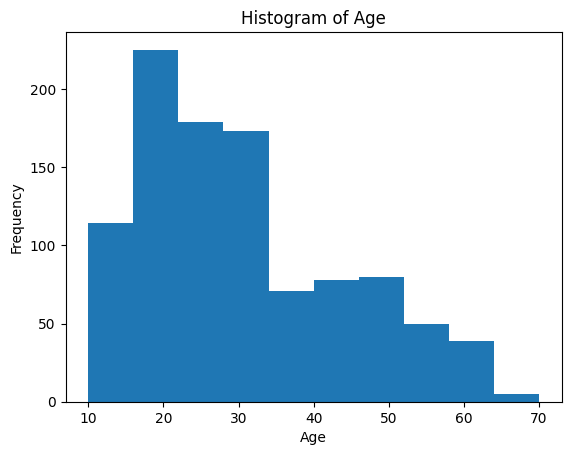

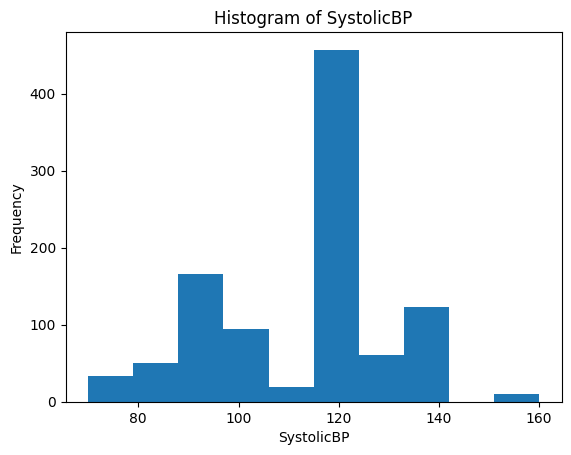

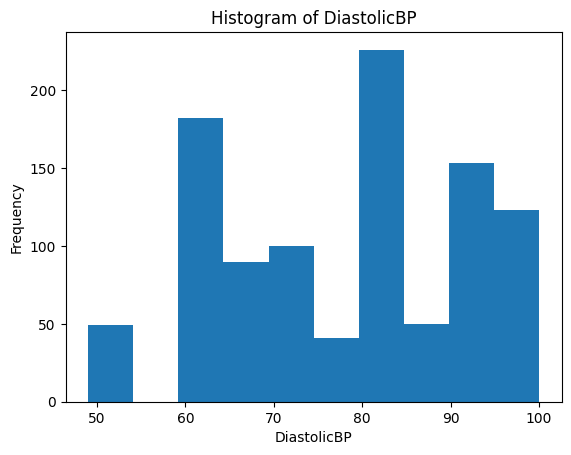

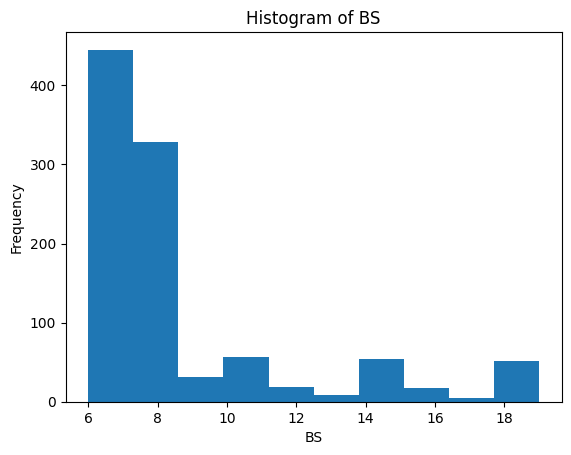

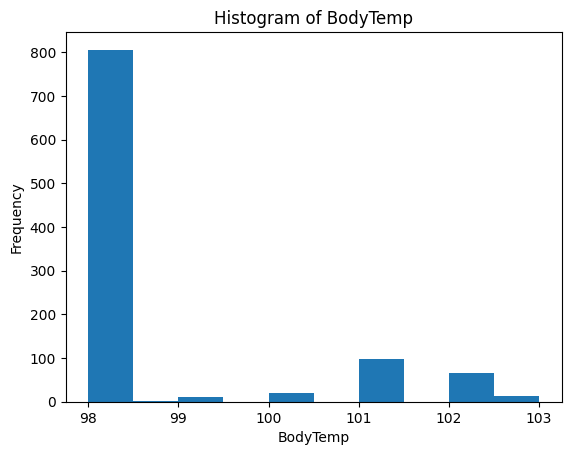

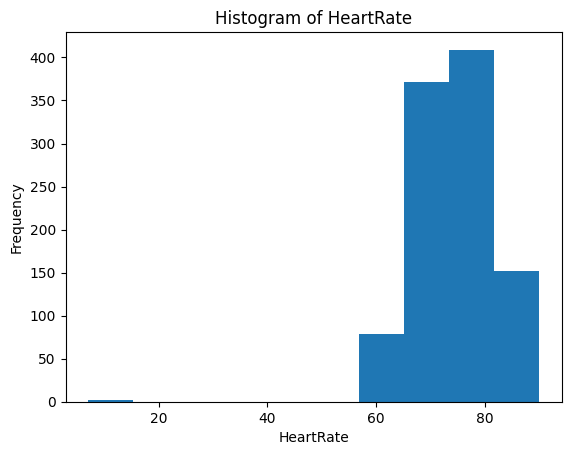

In [5]:
# Histogram feature distribution

import matplotlib.pyplot as plt

# Iterate through all columns except the last one
for col in df.columns[:-1]:
    plt.figure()  # Create a new figure for each histogram
    plt.hist(df[col])
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


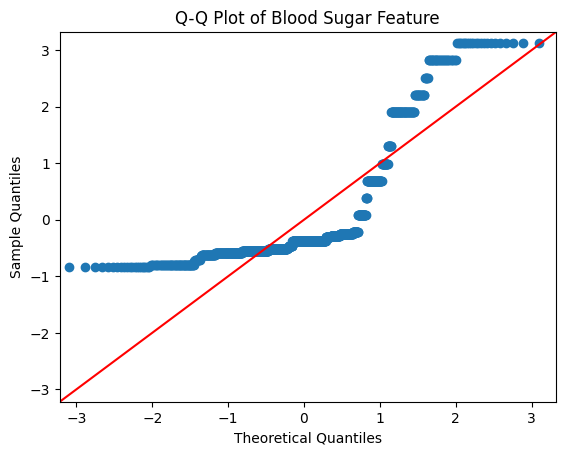

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot

fig = sm.qqplot(df["BS"],norm, fit=True, line='45')
plt.title("Q-Q Plot of Blood Sugar Feature")
plt.show()

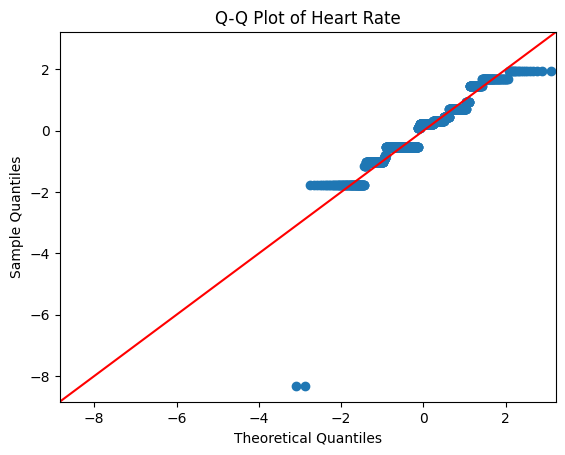

In [ ]:
fig = sm.qqplot(df["HeartRate"], norm, fit=True, line='45')
plt.title("Q-Q Plot of Heart Rate")
plt.show()

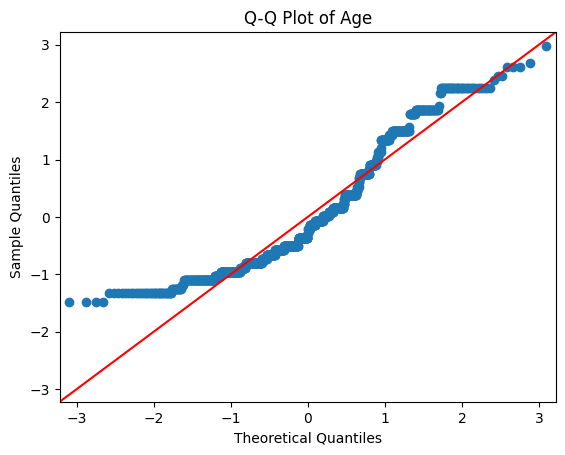

In [ ]:
fig = sm.qqplot(df["Age"],norm, fit=True, line='45')
plt.title("Q-Q Plot of Age")
plt.show()

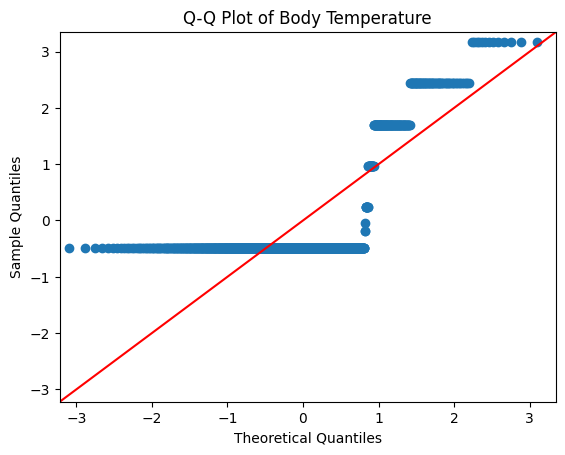

In [ ]:
fig = sm.qqplot(df["BodyTemp"],norm, fit=True, line='45')
plt.title("Q-Q Plot of Body Temperature")
plt.show()

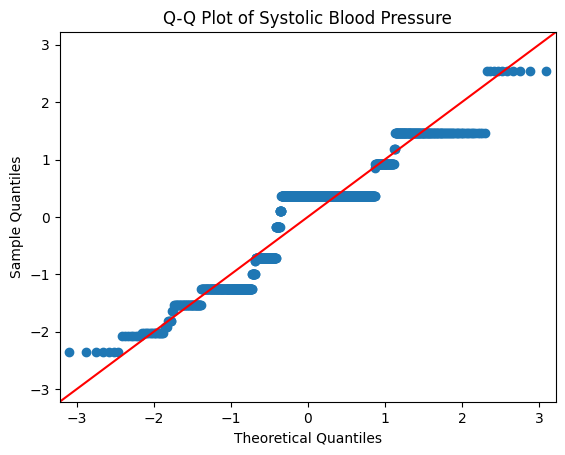

In [ ]:
fig = sm.qqplot(df["SystolicBP"], norm, fit=True, line='45')
plt.title("Q-Q Plot of Systolic Blood Pressure")
plt.show()

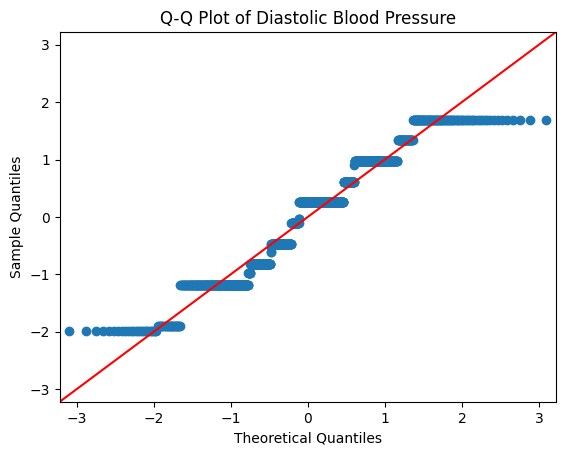

In [ ]:
fig = sm.qqplot(df["DiastolicBP"], norm, fit=True, line='45')
plt.title("Q-Q Plot of Diastolic Blood Pressure")
plt.show()